In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
file = "../data/languages/languages_and_dialects_geo.csv"

In [3]:
df = pd.read_csv(file)

In [1]:
# in top-level family category, get rid of pidgin, other, sign languages, artificial langauge.


In [8]:
df

,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,3adt1234,3Ad-Tekles,NaN,dialect,Africa,NaN,NaN
1,aala1237,Aalawa,NaN,dialect,Papunesia,NaN,NaN
2,aant1238,Aantantara,NaN,dialect,Papunesia,NaN,NaN
3,aari1239,Aari,aiw,language,Africa,5.95034,36.5721
4,aari1240,Aariya,aay,language,Eurasia,NaN,NaN
...,...,...,...,...,...,...,...
21741,zuwa1238,Zuwadza,NaN,dialect,Papunesia,NaN,NaN
21742,zwal1238,Zwall,NaN,dialect,Africa,NaN,NaN
21743,zyph1238,Zyphe,zyp,language,Eurasia,22.52400,93.2640
21744,zyud1238,Zyuzdin,NaN,dialect,Eurasia,NaN,NaN


In [50]:
lang2lat=dict()
lang2long=dict()
for iso, lat, long in zip(df["isocodes"], df["latitude"], df["longitude"]):
    lang2lat[iso]=lat
    lang2long[iso]=long

In [44]:
lang2geo_all.pop(np.nan)

(nan, nan)

In [9]:
df_america= df[df["macroarea"].str.contains("America", na=False)]

In [59]:
df_america.to_csv("../data/americas/languages_america.csv", index=False)

In [12]:
lang2geo = dict()
for iso, lat, long in zip(df_america["isocodes"], df_america["latitude"], df_america["longitude"]):
    lang2geo[iso]=(lat,long)

In [15]:
lang2geo

{'axb': (-29.0, -61.0),
 'tpx': (17.1034, -99.0602),
 'aca': (4.38649, -72.2005),
 'guq': (-25.5865, -56.4697),
 'acr': (15.073, -90.3513),
 'acc': (nan, nan),
 'acu': (-2.82646, -77.2641),
 'acv': (41.0979, -121.191),
 'acs': (-12.594, -40.21445),
 'xad': (31.6314, -92.0059),
 'ash': (-1.284096, -75.084405),
 'afs': (31.7843, -99.2934),
 'avo': (-13.29849, -53.43936),
 'agu': (15.3307, -91.3153),
 'aga': (-5.25, -75.8333),
 'agr': (-5.30044, -77.9218),
 'aht': (61.7068, -144.889),
 'tba': (-12.6695, -60.5353),
 'cpc': (-9.82364, -74.61947),
 'knj': (15.5932, -91.8421),
 'ake': (6.16277, -60.862),
 'aqz': (-12.8322, -60.9716),
 'ako': (3.19607, -55.6294),
 'akz': (30.76738, -94.62848),
 'mim': (17.25, -98.58),
 'apv': (-12.329886, -59.996702),
 'lsc': (17.06144, -96.29642),
 'xta': (17.3687, -98.3969),
 'ale': (52.1228, -174.29),
 'alq': (47.3876, -77.5258),
 'zaq': (17.4137, -96.7438),
 'aes': (44.408, -123.94),
 'amc': (-10.2012, -72.3208),
 'ama': (-3.79772, -48.6613),
 'amr': (-12.

In [16]:
df_colex = pd.read_csv("../data/preprocessed/colex_pron_geo_dedup.csv")

In [20]:
df_conc = pd.read_csv("../data/wordlists/concreteness_ratings.csv")

<Axes: ylabel='Frequency'>

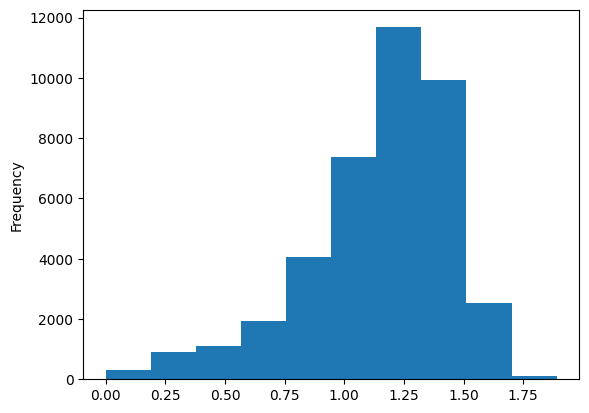

In [22]:
df_conc["Conc.SD"].plot(kind='hist')

In [28]:
df_conc

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX
0,a,0,1.46,1.14,2,30,0.93,1041179
1,aardvark,0,4.68,0.86,0,28,1.00,21
2,aback,0,1.65,1.07,4,27,0.85,15
3,abacus,0,4.52,1.12,2,29,0.93,12
4,abandon,0,2.54,1.45,1,27,0.96,413
...,...,...,...,...,...,...,...,...
39949,zebra crossing,1,4.56,0.75,1,28,0.96,0
39950,zero tolerance,1,2.21,1.45,0,29,1.00,0
39951,ZIP code,1,3.77,1.59,0,30,1.00,0
39952,zoom in,1,3.57,1.40,0,28,1.00,0


In [29]:
word2sd = dict(zip(df_conc["Word"], df_conc["Conc.SD"]))

In [30]:
df_colex["Conc.SD.1"]=df_colex["C1"].apply(lambda x: word2sd.get(x,np.NaN))
df_colex["Conc.SD.2"]=df_colex["C2"].apply(lambda x: word2sd.get(x, np.NaN))

In [ ]:
lang2geo_all

In [51]:
df_colex["Latitude"] = df_colex["LANG_PRON"].apply(lambda x: lang2lat.get(x, np.NaN))
df_colex["Longitude"] = df_colex["LANG_PRON"].apply(lambda x: lang2long.get(x, np.NaN))

In [52]:
df_colex

,SENSE_LEMMA,LANG,SYNSET1,SYNSET2,C1,C2,Conc.M.1,Conc.M.2,lang,LANG_PRON,LANG_NAME,lemma_lang,PRON,Latitude,Longitude,COLEX,diff,Conc.SD.1,Conc.SD.2
0,protubérance,FR,gnarl#v#1,knot#n#4,gnarl,knot,3.13,4.87,fr,fra,French,protubérance_fra,p ʁ ɔ t y b e ʁ ɑ̃ s,48.0000,2.0000,gnarl~knot,True,1.29,0.43
1,protubérance,FR,gnarl#v#1,murmur#v#2,gnarl,murmur,3.13,3.19,fr,fra,French,protubérance_fra,p ʁ ɔ t y b e ʁ ɑ̃ s,48.0000,2.0000,gnarl~murmur,True,1.29,1.47
2,protubérance,FR,bulge#n#1,gnarl#v#1,bulge,gnarl,3.92,3.13,fr,fra,French,protubérance_fra,p ʁ ɔ t y b e ʁ ɑ̃ s,48.0000,2.0000,bulge~gnarl,True,1.32,1.29
3,protubérance,FR,knot#n#4,murmur#v#2,knot,murmur,4.87,3.19,fr,fra,French,protubérance_fra,p ʁ ɔ t y b e ʁ ɑ̃ s,48.0000,2.0000,knot~murmur,True,0.43,1.47
4,protubérance,FR,bulge#n#1,knot#n#4,bulge,knot,3.92,4.87,fr,fra,French,protubérance_fra,p ʁ ɔ t y b e ʁ ɑ̃ s,48.0000,2.0000,bulge~knot,True,1.32,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945377,interagire,IT,interact#v#1,intervene#v#1,interact,intervene,2.88,2.57,it,ita,Italian,interagire_ita,i n t e r a d͡ʒ i r e,43.0464,12.6489,interact~intervene,True,1.42,1.25
945378,interfere,EN,interfere#v#1,intervene#v#1,interfere,intervene,2.59,2.57,en,eng,English,interfere_eng,ɪ n t ɚ f ɪ ɹ,53.0000,-1.0000,interfere~intervene,True,1.27,1.25
945379,번역하다,KO,interpret#v#3,translate#v#1,interpret,translate,2.34,2.69,ko,kor,Korean,번역하다_kor,p ʌ̹ ɲ ʌ̹ kʰ a̠ d a̠,37.5400,126.9800,interpret~translate,True,1.42,1.63
945380,บุกรุก,TH,intrude#v#1,trespass#v#1,intrude,trespass,2.81,3.43,th,tha,Thai,บุกรุก_tha,b u k̚ ˨˩ r u k̚ ˦˥,14.1920,100.6710,intrude~trespass,True,1.04,1.35


In [ ]:
df_colex.to_csv("../data/preprocessed/...")

In [35]:
df_colex_america= df_colex[df_colex["LANG_PRON"].isin(lang2geo)]

In [56]:
df_colex_america["LANG_NAME"].value_counts()

Navajo                 23
Pennsylvania German     5
Mi'kmaq                 4
Western Apache          4
Sranan Tongo            2
Classical Nahuatl       2
Kalaallisut             1
Hunsrik                 1
Name: LANG_NAME, dtype: int64

In [57]:
df_colex_america.to_csv("../data/americas/data.csv", index=False)

In [40]:
lang2geo["nav"]

(36.33, -109.38)